In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add parent directory to path

In [ ]:
# Converts all images data to FITS format
from src.preprocess.image_preprocessor import ImagePreprocessor

folder = "../data/raw/galaxy10_decals"
size = 256

for filename in os.listdir(folder):
    image_name = filename.split('.')[0]
    output_folder = f"../data/processed/{image_name}"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    if os.path.exists(f"../data/processed/{image_name}/groundtruth"):
        continue

    print(f"Processing {image_name}...")
    
    preprocessor = ImagePreprocessor(
        image_path=os.path.join(folder, filename),
        width=size,
        height=size
    )
    preprocessor.convert_to_fits(output_folder=f"../data/processed/{image_name}/groundtruth")
    #preprocessor.show_image()

In [ ]:
# Simulate all images in the processed folder
from src.preprocess.simulator import Simulator

simoberve_config = {
    'antenna' : 'alma.out08.cfg',
    'totaltime' : 20, # in seconds
    'noise': 100,  # in Jy
}

proccesed_folder = "../data/processed"
for filename in os.listdir(proccesed_folder):
    if os.path.exists(f"{proccesed_folder}/{filename}/ms"):
        continue

    simulator = Simulator(
        image=f"../data/raw/fits/{filename}.fits",
        simobserve_config=simoberve_config,
        output_folder="../data/processed"
    )
    try:
        simulator.simulate()
    except Exception as e:
        print(f"Error simulating {filename}: {e}")
        continue

Error simulating ms: No sky input found.  At least one of skymodel or complist must exist.
Error simulating .DS_Store: [Errno 2] No such file or directory: ''


2025-06-24 05:52:31	WARN	simobserve::simutil::casa	Your skymodel '/Users/luisvalenzuela/Documents/Programs/Memoria/data/raw/fits/ms.fits' could not be found.
2025-06-24 05:52:31	SEVERE	simobserve::::casa	Task simobserve raised an exception of class Exception with the following message: No sky input found.  At least one of skymodel or complist must exist.
2025-06-24 05:52:31	SEVERE	simobserve::::casa	Task simobserve raised an exception of class FileNotFoundError with the following message: [Errno 2] No such file or directory: ''


Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/Memoria/data/processed/image_2_label_0/groundtruth/image_2_label_0.fits


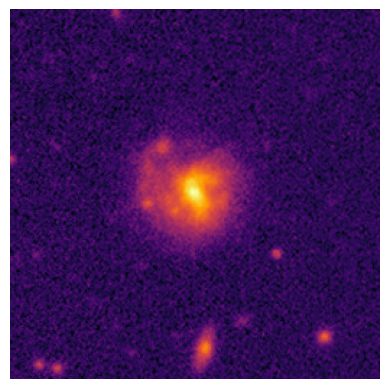

In [ ]:
# Convert a specific image to FITS format and show it
from src.preprocess.image_preprocessor import ImagePreprocessor

image = 'image_2_label_0'
data = f"../data/raw/galaxy10_decals/{image}.png"

output_folder = f"../data/processed/{image}"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

size = 256
preprocessor = ImagePreprocessor(image_path=data, width=size, height=size)
preprocessor.convert_to_fits(output_folder=f"../data/processed/{image}/groundtruth")
preprocessor.show_image()

2025-06-24 05:40:35	WARN	simobserve::simutil::casa	Not all pointings in the mosaic will be observed - check mosaic setup and exposure time parameters!
2025-06-24 05:40:35	WARN	noise::CTPatchedInterp::interpolate	In caltable image_2_label_0.alma.out08.noisy.T.cal_sim_temp (Tf Jones):
2025-06-24 05:40:35	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-06-24 05:40:35	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.


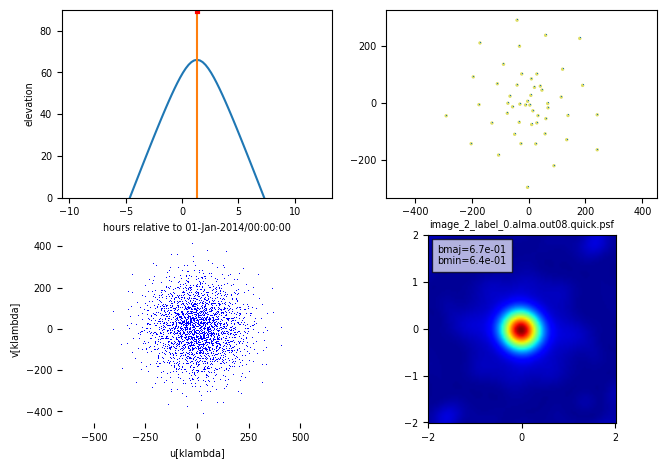

In [ ]:
# Simulate a specific image
from src.preprocess.simulator import Simulator

simoberve_config = {
    'antenna' : 'alma.out08.cfg',
    'totaltime' : 20, # in seconds
    'noise': 100,  # in Jy
}

simulator = Simulator(
    image=f"../data/raw/fits/{image}.fits",
    simobserve_config=simoberve_config,
    output_folder="../data/processed"
)

simulator.simulate()

2025-06-24 05:40:33	WARN	task_tclean::SIImageStore::restore (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SIImageStore.cc, line 2298)	Restoring with an empty model image. Only residuals will be processed to form the output restored image.


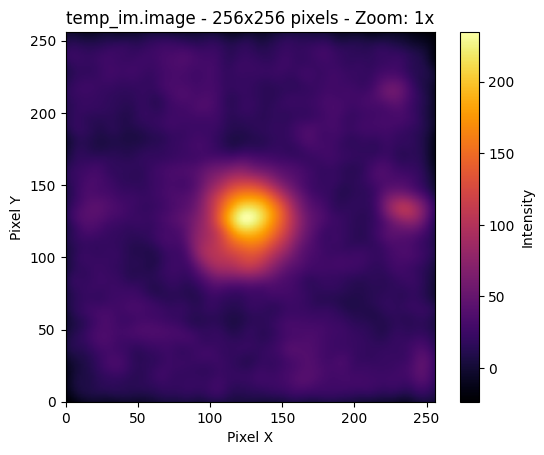

In [10]:
from src.utils.plot import plot_ms

ms_file = f"../data/processed/{image}/ms/{image}.alma.out08.ms"
plot_ms(ms_file)